In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.family'] = 'Arial'
plt.rcParams.update({'font.size': 7})
plt.rcParams['axes.titley'] = 0.5

In [2]:
#create a 2D_Grid 
NGrid=7
Nsites= np.int64(NGrid*NGrid) # No. of sites

Nsites_X = np.resize(np.arange(1,NGrid+1),NGrid*NGrid) # X-coords
Nsites_Y = np.repeat(np.arange(NGrid,0,-1),NGrid) # Y-coords 

# Assign Mean, standard deviation and sample size to selected meshes 
NObs = np.zeros(Nsites,dtype=int)
NObs[2] = 10
NObs[13] = 10
NObs[15] = 10
NObs[10] = 20
NObs[29] = 50
NObs[33] = 20
NObs[38] = 30
NObs[39] = 20

mean = np.empty(Nsites)
mean[:] = np.nan
mean[13] = 2.2
mean[2] = 0.5
mean[15] = 1.2
mean[10] = 2.2
mean[29] = 1.1
mean[33] = 2.1
mean[38] = 2.2
mean[39] = 2.2

std = np.empty(Nsites)
std[:] = np.nan
std[13] = 0.4
std[2] = 0.4
std[15] = 0.4
std[10] = 0.4
std[29] = 0.4
std[33] = 0.4
std[38] = 0.4
std[39] = 0.4

# Create the sparse dataset
np.random.seed(888)
data_source=np.empty((Nsites,np.max(NObs)))
data_source[:] = np.nan
for i in range (0,Nsites):
    data_source[i,0:NObs[i]]=np.random.normal(loc=mean[i],scale=std[i],size=NObs[i])

In [3]:
#save sample_dataset as a .csv file
Nsites_SL= range(1,Nsites+1,1)
df1 = pd.DataFrame(data_source)
df1.columns = ['Data_'+str(i) for i in range(1,max(NObs)+1)]
df2 = pd.DataFrame({"Sites" : Nsites_SL, "X" : Nsites_X, "Y" : Nsites_Y})
df = pd.concat([df2, df1], axis=1, join='inner')
df.to_csv("sample_dataset.csv", index=False)

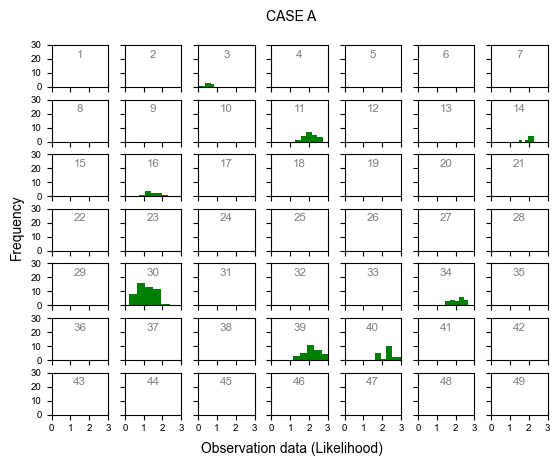

In [4]:
#plot the histograms at sites
df2= df1.T

fig, ax = plt.subplots(NGrid, NGrid, sharex='col', sharey='row')
plt.setp(ax, xlim=(0,3), ylim=(0,30))
plt.setp(ax, xticks=[0,1,2,3],yticks=[0,10,20,30])
fig.text(0.5, 0.03, 'Observation data (Likelihood)', ha='center',fontsize=10)
fig.text(0.06, 0.5, 'Frequency', va='center', rotation='vertical',fontsize=10)
fig.text(0.5, 0.93, 'CASE A', ha='center',fontsize=10)

m=0
for i in range(NGrid):
    for j in range(NGrid): 
          df2.hist(column = df2.columns[m], bins = 5, ax=ax[i,j], figsize=(1, 1),alpha=1,color="green",grid=False)
          ax[i,j].title.set_text(m+1)
          ax[i,j].title.set_color('gray')
          m+=1

fig.savefig('Data_Histogram.png')

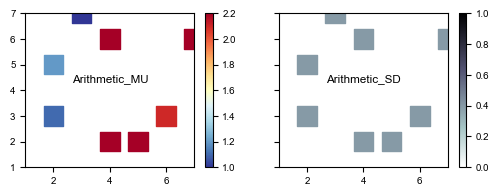

In [6]:
#plot_Arithmetic Mean and SD

x = Nsites_X
y = Nsites_Y

z1 = mean
z2 = std

fig, (ax1,ax2) = plt.subplots(1,2, sharex='col', sharey='row', figsize=(6,2))

z1_cm = plt.cm.get_cmap('RdYlBu_r')
z2_cm = plt.cm.get_cmap('bone_r')

z1_sc=ax1.scatter(x, y, c=z1, s=200,vmax=2.2,vmin=1,cmap=z1_cm, marker="s")
fig.colorbar(z1_sc)
ax1.title.set_text("Arithmetic_MU")
ax1.set_xlim(1,NGrid)
ax1.set_ylim(1,NGrid)


z2_sc=ax2.scatter(x, y, c=z2, s=200,vmax=1, vmin=0,cmap=z2_cm, marker="s")
fig.colorbar(z2_sc)
ax2.title.set_text("Arithmetic_SD")
ax2.set_xlim(1,NGrid)
ax2.set_ylim(1,NGrid)

plt.show()

fig.savefig('Data_Mean_SD.png')